#Bike Sharing Assignment - Linear Regression - By Rucha Tare

##Step1: Data Sourcing

###Importing Libraries to python , mapping Gdrive , Importing datasets

In [ ]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
#Importing needed libraries to python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import statsmodels.api as sm
 

###1.1: Set PD options
as a practice, although the data is smaller in size

In [ ]:
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

###1.2:Import CSV day file 

Mounting Gdrive 

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing CSV file 

In [ ]:
bike = pd.read_csv("/content/drive/My Drive/day.csv", engine='python', encoding='utf-8')

Checking the data imported

In [ ]:
bike.shape

(730, 16)

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
bike.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.111,18.181,80.583,10.750,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.903,17.687,69.609,16.652,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.051,9.470,43.727,16.637,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200,10.606,59.044,10.740,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305,11.463,43.696,12.522,82,1518,1600


Checking the datatypes of the dataset 

In [ ]:
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

##Step2: Data Cleaning

###2.1: Fixing null values

#### Checking null values 

In [ ]:
(bike.isna() == True).sum().sort_values(ascending=False)

cnt           0
registered    0
casual        0
windspeed     0
hum           0
atemp         0
temp          0
weathersit    0
workingday    0
weekday       0
holiday       0
mnth          0
yr            0
season        0
dteday        0
instant       0
dtype: int64

There are no null values in the any of the columns , hence there is no reason to check further for percentages of nulls 

###2.2: Fixing duplicate columns

#### Checking and dropping duplicate rows

In [ ]:
bike.drop_duplicates(subset=None,inplace=True)

In [ ]:
bike.shape

(730, 16)

There are no duplicate rows in the data set

###2.3: Fixing irrelevant columns

####Checking the columns 

In [ ]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 97.0+ KB


####**Column cnt is our target variable**

As we look at the dataset we deduce that below columns are irrelevant to our analysis
1. instant : This columns is just a counter that we donot require for analysis
2. casual and regsitered : Both of these columns are to show the type of users , this is irrelevant to our analysis
3. atemp : atemp is adjusted temperature , since we already have temparature we will drop this column
4. dteday : Since we already have day, month and year we donot need date

In [ ]:
col_irrelevant=['instant','casual','registered','atemp','dteday']
bike.drop(col_irrelevant, axis = 1, inplace = True)

Checking the shape of new dataset

In [ ]:
bike.shape

(730, 11)

####**Now our dataset has 11 columns**

####Checking for redundant data/non unique columns

In [ ]:
unique_col = bike.nunique()
unique_col = unique_col[unique_col.values == 1]
print(unique_col)

Series([], dtype: int64)


There are no non unique columns 

###2.4 Fixing Invalid values 

We will change the labels 

In [ ]:
season_labels = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}
bike['season'] = bike['season'].replace(season_labels)

In [ ]:
mnth_labels = {
    1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'
}
bike['mnth'] = bike['mnth'].replace(mnth_labels)

As per calendar of 2018 , 01-01-2018 was a monday i.e weekday = 6 as per data dictionary. so we will go ahead with this standard 

In [ ]:
weekday_labels = { 
    0 : 'tuesday',
    1 : 'wednesday',
    2 : 'thursday',
    3 : 'friday',
    4 : 'saturday',
    5 : 'sunday',
    6 : 'monday'
}
bike['weekday'] = bike['weekday'].replace(weekday_labels)

In [ ]:
weathersit_labels = {
    1 : 'clear',
    2 : 'cloudy',
    3 : 'light snow/rain',
    4 : 'heavy rain'
}
bike['weathersit'] = bike['weathersit'].replace(weathersit_labels)

##Step3 : Exploratory Data Analysis

###3.1 Target variable analysis 


In [ ]:
round(bike['cnt'].mean())

4508

Mean count of bike rented is 4508 

###3.2: Data visualization using plots

In [ ]:
def barplot(x_col_name):
    sns.barplot(x=x_col_name, y='cnt', data=bike)
    plt.show()

Plotting our target variable against predictor variables

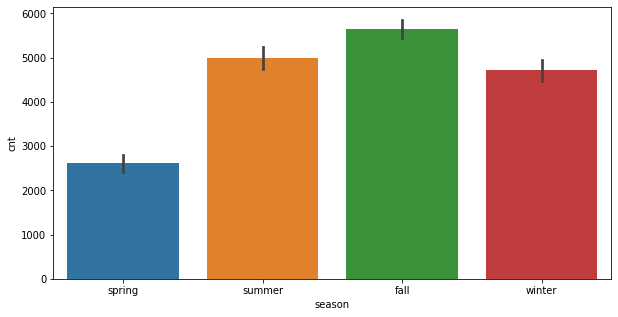

In [ ]:
plt.figure(figsize=(10, 5))
barplot('season')

####**Insight:Maximum bikes are rented in fall**

Plotting year against cnt
here 1 = 2019
and 0 = 2018

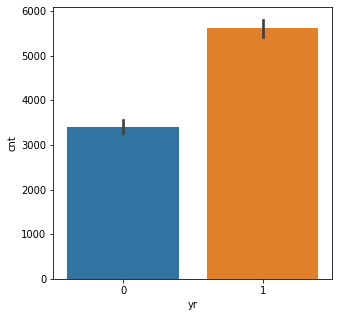

In [ ]:
plt.figure(figsize=(5, 5))
barplot('yr')

####**Insights:max bikes are rented in the year 2019**

Plotting mnth against cnt
Here jan is represented by 1 and Dec by 12 and so on

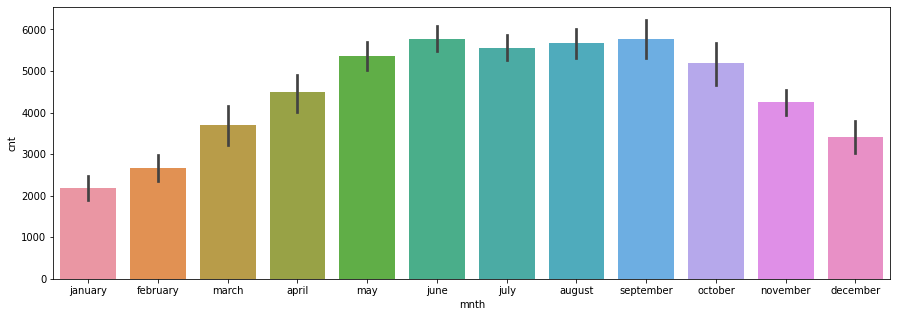

In [ ]:
plt.figure(figsize=(15, 5))
barplot('mnth')

####**Insights: Most number of bikes are rented in June**

Plotting holiday against cnt
Here holiday is represented by 1 and Non holiday  by 0

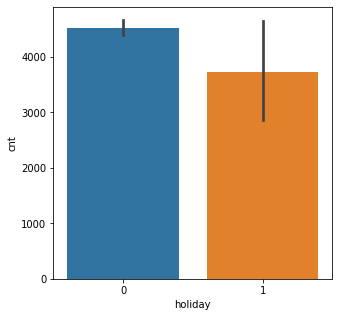

In [ ]:
plt.figure(figsize=(5, 5))
barplot('holiday')

####**Insights: More number of bikes are rented on non holiday**

Plotting weekday against cnt

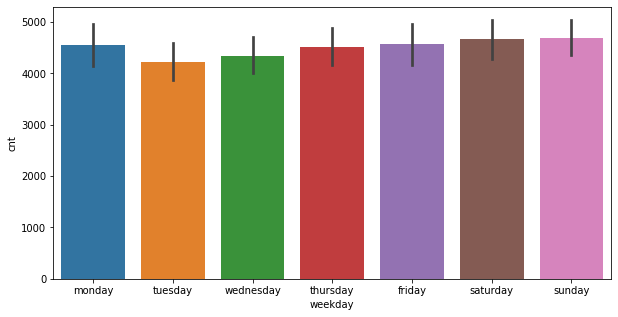

In [ ]:
plt.figure(figsize=(10, 5))
barplot('weekday')

####**Insights: More number of bikes are rented on Saturday**

Plotting workingday against cnt
here working day = 1 and holiday/weekend = 0 

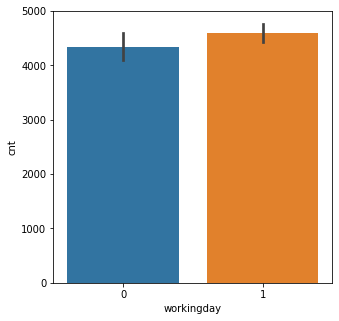

In [ ]:
plt.figure(figsize=(5, 5))
barplot('workingday')

####**Insights: More number of bikes are rented on working day**

Plotting weathersit against cnt
here 
1. Clear, Few clouds, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

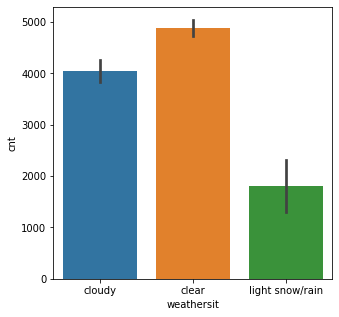

In [ ]:
plt.figure(figsize=(5, 5))
barplot('weathersit')

####**Insights: More number of bikes are rented on a clear or partly clouded day**

###3.4: Pair Plotting for the entire dataset

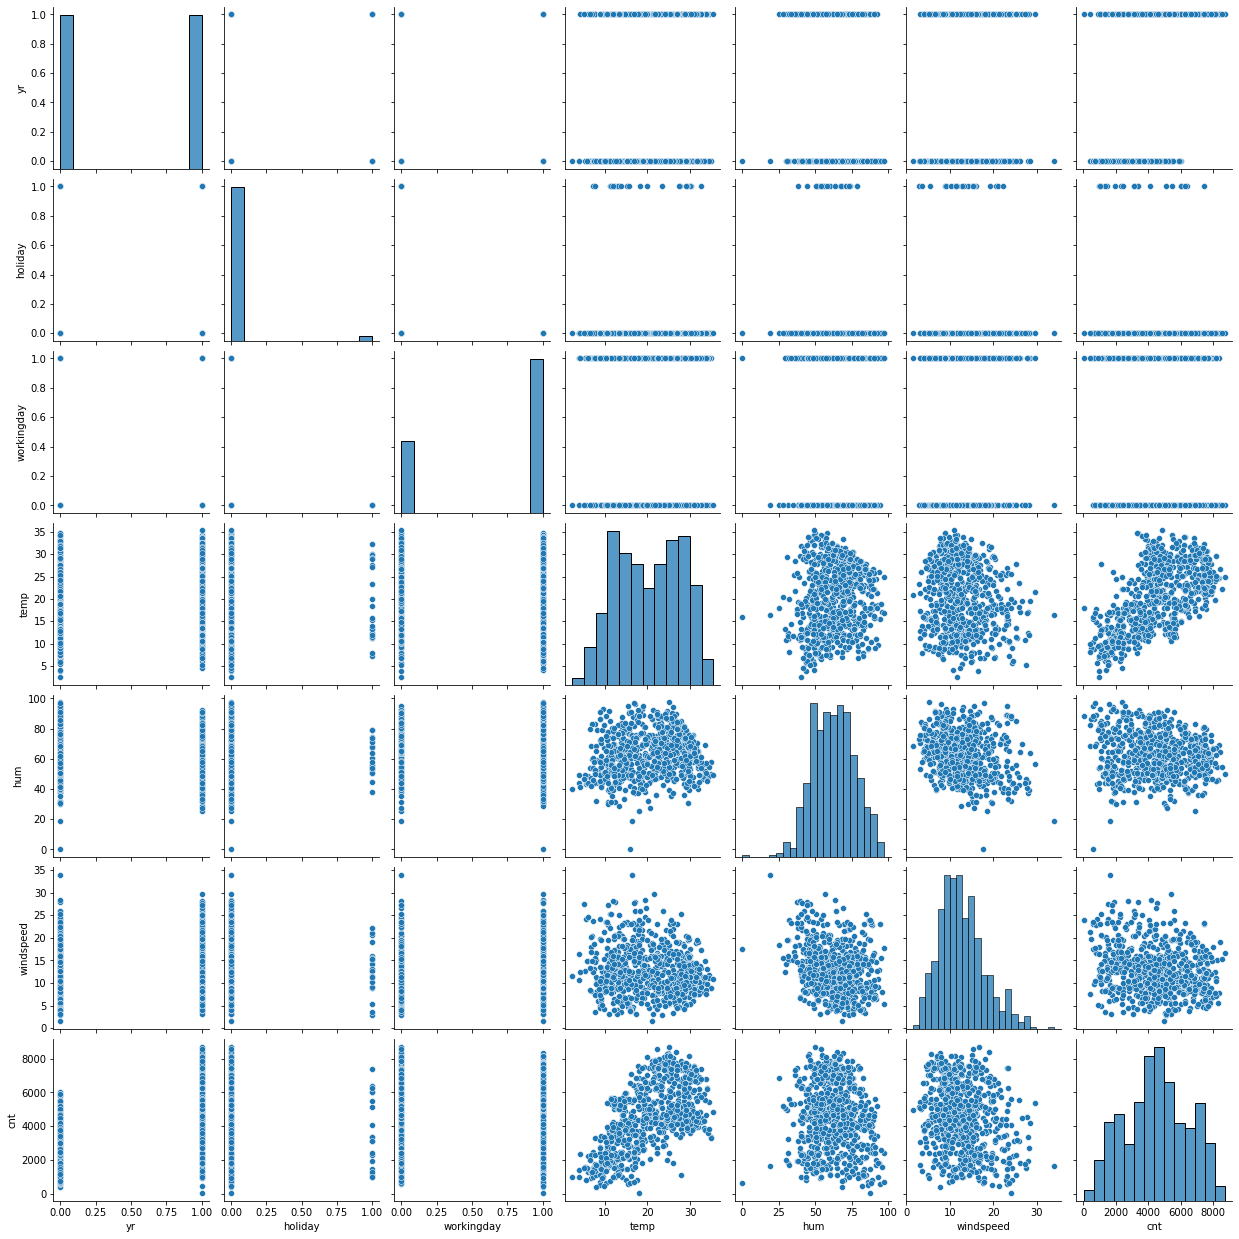

In [ ]:
sns.pairplot(bike)
plt.show()

###Assumption 1: The X and Y are in colinear relationship 

Y is our target variable cnt

###3.5: Heat map plotting for finding correlation

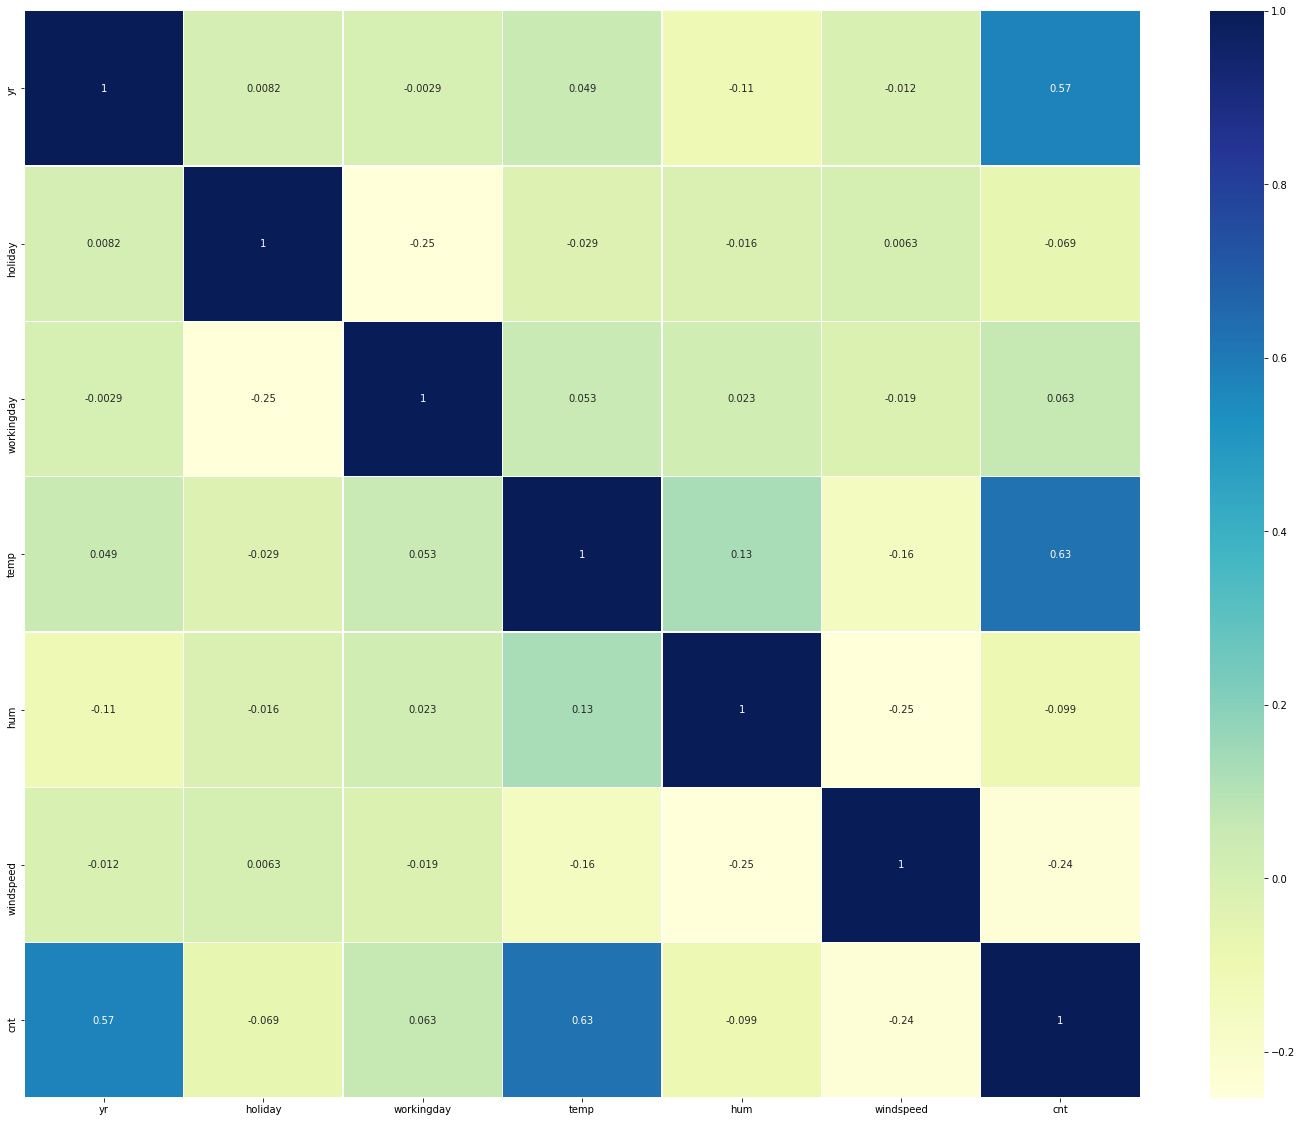

In [ ]:
plt.figure(figsize = (25,20))
sns.heatmap(bike.corr(), annot = True,cmap='YlGnBu', linewidths=0.3)
plt.show()

##Step4: Data preparation

###4.1: Fixing/Changing datatypes as needed

checking data types of all the columns 

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 88.4+ KB


converting below columns into categorical variables 
1. season
2. weekday
3. mnth
4. weathersit

Below columns are already mapped to 0 and 1 as we require
1. yr
2. holiday
3. workingday


In [ ]:
bike['season']=bike['season'].astype('category')
bike['weekday']=bike['weekday'].astype('category')
bike['mnth']=bike['mnth'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 69.5 KB


####4.2: Create dummy variables for categorical variables

In [ ]:
bike=pd.get_dummies(bike,drop_first=True)

checking the dataset again

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   hum                         730 non-null    float64
 5   windspeed                   730 non-null    float64
 6   cnt                         730 non-null    int64  
 7   season_spring               730 non-null    uint8  
 8   season_summer               730 non-null    uint8  
 9   season_winter               730 non-null    uint8  
 10  mnth_august                 730 non-null    uint8  
 11  mnth_december               730 non-null    uint8  
 12  mnth_february               730 non-null    uint8  
 13  mnth_january                730 non

In [ ]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_august',
       'mnth_december', 'mnth_february', 'mnth_january', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november', 'mnth_october',
       'mnth_september', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'weathersit_cloudy', 'weathersit_light snow/rain'],
      dtype='object')

##Step5: Split test and train dataset

Splitting dataset into 70 % training and 30% test dataset

In [ ]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

Check the datasets created

In [ ]:
bike_train.shape

(510, 29)

In [ ]:
bike_test.shape

(219, 29)

In [ ]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_cloudy,weathersit_light snow/rain
count,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000
mean,0.508,0.025,0.676,20.102,63.113,12.831,4486.382,0.243,0.245,0.249,0.096,0.084,0.067,0.088,0.076,0.075,0.098,0.084,0.086,0.086,0.080,0.155,0.133,0.127,0.131,0.143,0.151,0.343,0.029
std,0.500,0.158,0.468,7.431,14.157,5.292,1952.159,0.429,0.431,0.433,0.295,0.278,0.250,0.284,0.266,0.263,0.298,0.278,0.281,0.281,0.272,0.362,0.340,0.334,0.338,0.351,0.358,0.475,0.169
min,0.000,0.000,0.000,2.424,0.000,2.834,22.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,13.607,52.271,9.042,3120.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,0.000,1.000,20.210,63.438,12.083,4530.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,1.000,0.000,1.000,26.616,73.250,15.751,5973.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
max,1.000,1.000,1.000,35.328,97.042,34.000,8714.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [ ]:
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_cloudy,weathersit_light snow/rain
count,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000
mean,0.479,0.037,0.699,20.816,61.962,12.600,4546.982,0.256,0.265,0.233,0.059,0.087,0.100,0.078,0.105,0.096,0.055,0.087,0.073,0.082,0.087,0.119,0.164,0.178,0.164,0.146,0.128,0.320,0.027
std,0.501,0.188,0.460,7.690,14.457,4.985,1898.634,0.437,0.442,0.424,0.237,0.282,0.301,0.268,0.307,0.295,0.228,0.282,0.261,0.275,0.282,0.324,0.371,0.383,0.371,0.354,0.335,0.467,0.164
min,0.000,0.000,0.000,3.957,25.417,1.500,441.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,14.094,51.167,9.021,3303.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,1.000,20.808,60.917,12.167,4579.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,1.000,0.000,1.000,27.402,72.192,15.396,5869.500,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
max,1.000,1.000,1.000,34.816,97.250,28.000,8395.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


##Step 6: Rescaling the data

We will apply scaling to below numerical columns: (We will not apply it to dummy variables)
1. Temp
2. hum
3. windspeed
4. cnt


In [ ]:
scaler = MinMaxScaler()
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

Checking the dataset after scaling

In [ ]:
bike_train.head(5)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_cloudy,weathersit_light snow/rain
653,1,0,1,0.510,0.575,0.301,0.864,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815,0.726,0.265,0.828,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442,0.640,0.255,0.465,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245,0.498,0.663,0.204,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.396,0.505,0.188,0.483,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_cloudy,weathersit_light snow/rain
count,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000
mean,0.508,0.025,0.676,0.537,0.650,0.321,0.514,0.243,0.245,0.249,0.096,0.084,0.067,0.088,0.076,0.075,0.098,0.084,0.086,0.086,0.080,0.155,0.133,0.127,0.131,0.143,0.151,0.343,0.029
std,0.500,0.158,0.468,0.226,0.146,0.170,0.225,0.429,0.431,0.433,0.295,0.278,0.250,0.284,0.266,0.263,0.298,0.278,0.281,0.281,0.272,0.362,0.340,0.334,0.338,0.351,0.358,0.475,0.169
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.340,0.539,0.199,0.356,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,0.000,1.000,0.541,0.654,0.297,0.519,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,1.000,0.000,1.000,0.735,0.755,0.414,0.685,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


##Step 7: Dividing variables into X and Y

#### Our target variable is cnt which is our y_train and all other features are X_train

In [ ]:
y_train = bike_train.pop('cnt')
X_train = bike_train

##Step 8: Building a linear regression model

We will use both the methods to build a model 
RFE + manual method of checking VIF and P values 


####8.1: Using RFE (Recursive feature elimination) first 

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

Checking the RFE ranking 

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_august', False, 8),
 ('mnth_december', False, 4),
 ('mnth_february', False, 5),
 ('mnth_january', False, 2),
 ('mnth_july', True, 1),
 ('mnth_june', False, 11),
 ('mnth_march', False, 14),
 ('mnth_may', False, 6),
 ('mnth_november', False, 3),
 ('mnth_october', False, 12),
 ('mnth_september', True, 1),
 ('weekday_monday', True, 1),
 ('weekday_saturday', False, 13),
 ('weekday_sunday', False, 10),
 ('weekday_thursday', False, 9),
 ('weekday_tuesday', True, 1),
 ('weekday_wednesday', False, 7),
 ('weathersit_cloudy', True, 1),
 ('weathersit_light snow/rain', True, 1)]

Checking the rfe supported columns 


In [ ]:
col = X_train.columns[rfe.support_]

Checking columns that are not RFE supported 

In [ ]:
X_train.columns[~rfe.support_]

Index(['mnth_august', 'mnth_december', 'mnth_february', 'mnth_january',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november', 'mnth_october',
       'weekday_saturday', 'weekday_sunday', 'weekday_thursday',
       'weekday_wednesday'],
      dtype='object')

Creating new dataset with RFE columns

In [ ]:
X_train_rfe = X_train[col]

###8.2: Creating a model using statsmodel with all RFE columns

As we will be using statsmodel for model building we will need to add a constant 

In [ ]:
X_train_rfe = sm.add_constant(X_train_rfe)

build model

In [ ]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()

Checking the model created 

In [ ]:
lm1.params

const                         0.199
yr                            0.230
holiday                      -0.019
workingday                    0.084
temp                          0.528
hum                          -0.159
windspeed                    -0.181
season_spring                -0.055
season_summer                 0.053
season_winter                 0.100
mnth_july                    -0.055
mnth_september                0.082
weekday_monday                0.094
weekday_tuesday               0.040
weathersit_cloudy            -0.058
weathersit_light snow/rain   -0.246
dtype: float64

In [ ]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.13e-191
Time:                        17:54:32   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

####Insights: After our first model with RFE columns we have got 
1. Rsquared as 0.847
2. Adjusted Rsquared as 0.843
3. Durbin-Watson as 2.065
4. F statstic as 196.3
5. also t and p values 

Removing the added constant from X_train_rfe

In [ ]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

###8.3: checking VIF (Variance inflation factor)

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending = False)

In [ ]:
vif

,Features,VIF
2,workingday,50.690
11,weekday_monday,12.200
12,weekday_tuesday,11.790
6,season_spring,5.020
3,temp,3.620
8,season_winter,3.490
1,holiday,2.910
7,season_summer,2.610
4,hum,1.910
13,weathersit_cloudy,1.570


####Insights : Clearly we should drop holiday for high P value

In [ ]:
X_train_rfe2 = X_train_rfe.drop(["holiday"], axis = 1)

In [ ]:
X_train_rfe2.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_july', 'mnth_september',
       'weekday_monday', 'weekday_tuesday', 'weathersit_cloudy',
       'weathersit_light snow/rain'],
      dtype='object')

###8.4: Creating model 2  after dropping holiday 

As we will be using statsmodel for model building we will need to add a constant 

In [ ]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

build model

In [ ]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

Checking the model created 

In [ ]:
lm2.params

const                         0.180
yr                            0.230
workingday                    0.103
temp                          0.528
hum                          -0.159
windspeed                    -0.181
season_spring                -0.055
season_summer                 0.053
season_winter                 0.100
mnth_july                    -0.055
mnth_september                0.082
weekday_monday                0.113
weekday_tuesday               0.059
weathersit_cloudy            -0.058
weathersit_light snow/rain   -0.246
dtype: float64

In [ ]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.13e-191
Time:                        17:54:32   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

####Insights: After our first model with RFE columns we have got 
1. Rsquared as 0.847
2. Adjusted Rsquared as 0.843
3. Durbin-Watson as 2.065
4. F statstic as 196.3
 also t and p values

Removing the added constant from X_train_rfe2

In [ ]:
X_train_rfe2 = X_train_rfe2.drop(['const'], axis=1)

###8.5: checking VIF (Variance inflation factor) for model 2

---



In [ ]:
vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending = False)

In [ ]:
vif

,Features,VIF
3,hum,32.140
2,temp,18.980
1,workingday,18.410
10,weekday_monday,4.910
4,windspeed,4.900
5,season_spring,4.800
11,weekday_tuesday,4.760
7,season_winter,3.710
6,season_summer,3.030
12,weathersit_cloudy,2.310


####Insights : Clearly we should drop hum for high VIF value

In [ ]:
X_train_rfe3 = X_train_rfe2.drop(["hum"], axis = 1)

In [ ]:
X_train_rfe3.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_july', 'mnth_september',
       'weekday_monday', 'weekday_tuesday', 'weathersit_cloudy',
       'weathersit_light snow/rain'],
      dtype='object')

###8.6: Creating model 3 after dropping hum 

As we will be using statsmodel for model building we will need to add a constant 

In [ ]:
X_train_rfe3 = sm.add_constant(X_train_rfe3)

build model

In [ ]:
lm3 = sm.OLS(y_train,X_train_rfe3).fit()

Checking the model created 

In [ ]:
lm3.params

const                         0.101
yr                            0.234
workingday                    0.103
temp                          0.492
windspeed                    -0.149
season_spring                -0.065
season_summer                 0.046
season_winter                 0.086
mnth_july                    -0.050
mnth_september                0.076
weekday_monday                0.115
weekday_tuesday               0.057
weathersit_cloudy            -0.084
weathersit_light snow/rain   -0.290
dtype: float64

In [ ]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          5.73e-189
Time:                        17:54:32   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

####Insights: After our first model with RFE columns we have got 
1. Rsquared as 0.84
2. djusted Rsquared as 0.838
3. Durbin-Watson as 2.059
4. F statstic as 203
5. also t and p values 

Removing the added constant from X_train_rfe3

In [ ]:
X_train_rfe3 = X_train_rfe3.drop(['const'], axis=1)

###8.7: checking VIF (Variance inflation factor) for model 3

---



In [ ]:
vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending = False)

In [ ]:
vif

,Features,VIF
1,workingday,16.190
2,temp,12.730
3,windspeed,4.750
9,weekday_monday,4.450
10,weekday_tuesday,4.210
4,season_spring,3.820
6,season_winter,2.800
5,season_summer,2.750
0,yr,2.070
7,mnth_july,1.600


####Insights :Clearly we should drop workingday for high P value

In [ ]:
X_train_rfe4 = X_train_rfe3.drop(["workingday"], axis = 1)

In [ ]:
X_train_rfe4.columns

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_july', 'mnth_september', 'weekday_monday',
       'weekday_tuesday', 'weathersit_cloudy', 'weathersit_light snow/rain'],
      dtype='object')

###8.8: Creating model 4  after dropping working day 

As we will be using statsmodel for model building we will need to add a constant 

In [ ]:
X_train_rfe4 = sm.add_constant(X_train_rfe4)

build model

In [ ]:
lm4 = sm.OLS(y_train,X_train_rfe4).fit()

Checking the model created 

In [ ]:
lm4.params

const                         0.201
yr                            0.234
temp                          0.493
windspeed                    -0.151
season_spring                -0.068
season_summer                 0.047
season_winter                 0.083
mnth_july                    -0.049
mnth_september                0.072
weekday_monday                0.016
weekday_tuesday              -0.042
weathersit_cloudy            -0.082
weathersit_light snow/rain   -0.286
dtype: float64

In [ ]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.01e-186
Time:                        17:54:32   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

####Insights: After our fourth  model with RFE columns we have got 
1. Rsquared as 0.837
2. djusted Rsquared as 0.833
3. Durbin-Watson as 2.010
4. F statstic as 212
5. also t and p values 

Removing the added constant from X_train_rfe4

In [ ]:
X_train_rfe4 = X_train_rfe4.drop(['const'], axis=1)

###8.9: checking VIF (Variance inflation factor) for model 4

---



In [ ]:
vif = pd.DataFrame()
X = X_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending = False)

In [ ]:
vif

,Features,VIF
1,temp,5.170
2,windspeed,4.620
4,season_summer,2.230
3,season_spring,2.110
0,yr,2.070
5,season_winter,1.820
6,mnth_july,1.590
10,weathersit_cloudy,1.550
7,mnth_september,1.330
8,weekday_monday,1.220


####Insights: All VIF except temp are below threshold of 5 , we cannot drop temp so we will drop weekday_monday for its high p value 

In [ ]:
X_train_rfe5 = X_train_rfe4.drop(["weekday_monday"], axis = 1)

In [ ]:
X_train_rfe5.columns

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_july', 'mnth_september', 'weekday_tuesday',
       'weathersit_cloudy', 'weathersit_light snow/rain'],
      dtype='object')

###8.8: Creating model 5  after dropping weekday_monday

As we will be using statsmodel for model building we will need to add a constant 

In [ ]:
X_train_rfe5 = sm.add_constant(X_train_rfe5)

build model

In [ ]:
lm5 = sm.OLS(y_train,X_train_rfe5).fit()

Checking the model created 

In [ ]:
lm5.params

const                         0.204
yr                            0.234
temp                          0.492
windspeed                    -0.150
season_spring                -0.068
season_summer                 0.047
season_winter                 0.083
mnth_july                    -0.049
mnth_september                0.072
weekday_tuesday              -0.045
weathersit_cloudy            -0.082
weathersit_light snow/rain   -0.286
dtype: float64

In [ ]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.65e-187
Time:                        17:54:32   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

####Insights: After our fourth  model with RFE columns we have got 
1. Rsquared as 0.836
2. djusted Rsquared as 0.832
3. Durbin-Watson as 2.009
4. F statstic as 230
5. also t and p values 

Removing the added constant from X_train_rfe5

In [ ]:
X_train_rfe5 = X_train_rfe5.drop(['const'], axis=1)

###8.9: checking VIF (Variance inflation factor) for model 5

---



In [ ]:
vif = pd.DataFrame()
X = X_train_rfe5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending = False)

In [ ]:
vif

,Features,VIF
1,temp,5.130
2,windspeed,4.600
4,season_summer,2.220
3,season_spring,2.090
0,yr,2.070
5,season_winter,1.800
6,mnth_july,1.590
9,weathersit_cloudy,1.550
7,mnth_september,1.330
8,weekday_tuesday,1.170


###Insights: All the VIF values except temp are below threshold of 5 and since temp is highly corelated to our target variable we wont drop it . All the p values are approximately 0 so we will finalize this model

##Step 9: Model Interpretation of the final model

####Insights: After our fourth  model with RFE columns we have got 
1. Rsquared as 0.836
2. djusted Rsquared as 0.832
3. Durbin-Watson as 2.009 This value is close to 2 , means that there is no autocorrelation
4. F statstic as 230 This value > 0 hence our model is significant 
5. P values are 0 which states our model is significant 

####Insights : The VIF of Temperature is 5.130 but we will not drop it as it is in high correlation with our target variable apart from that All P values are 0 and all VIF values are below the threshold of 5 so we will stop model building here. We will for now consider this as our final model

### Assumption 2: from above we see VIF values are in our threshold so we confirm that there is no high multicollinearity

### Assumption 3: From DW value as 2.009 we see that here is no auto correlation , hence we verify this assumption of linear regression

###Equation of the final model

####Equation of best fitted line is : 
cnt=(0.2338 × yr)-(0.1498 × windspeed) + (0.4923 x Temp) + (0.0680 × season4) + (0.0467 x season_summer) + (0.0831 x season_winter) - (0.0486 x mnth_july) +  (0.0721 x mnth_september) - (0.0451 x weekday_tuesday) - (0.816 x weathersit_cloudy) - (0.2856 x weathersit_lightsnow/rain)

##Step 10 : Prediction using the final model on train data

First , lets add constant to Rfe4 again

In [ ]:
X_train_rfe5 = sm.add_constant(X_train_rfe5)

### 10.1:Making predictions

In [ ]:
y_train_cnt = lm5.predict(X_train_rfe5)

##Step11: Residual analysis of the train data

### 11.1: Checking assumptions of linear regression 
We have already checked few assumptions earlier, we will check the rest here

### Assumption 4 : Checking if the error terms are normally distributed 

Plotting a histogram for error terms

Text(0.5, 0, 'Errors')

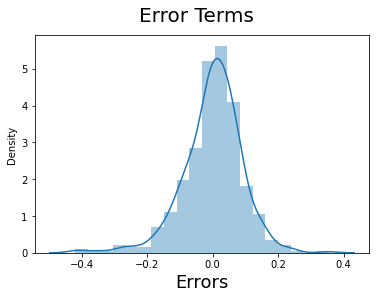

In [ ]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)     
plt.xlabel('Errors', fontsize = 18)                         

####Insights: The above plot shows that error terms are normally distributed . 
Hence our first assumption of the linear regression is valid 

###Assumption 5 : Checking if there is no heteroscedasticity 

Text(0, 0.5, 'Residuals')

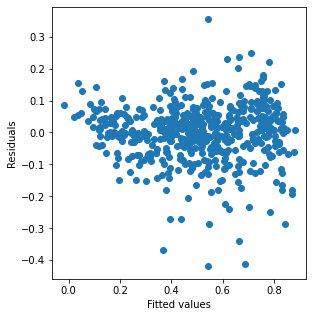

In [ ]:
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(y_train_cnt, (y_train-y_train_cnt))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

There is no funnel shape pattern to be found in the above plot and hence there is no heteroscedasticity

##Step 12: Making Predictions on the test data using the final model

### 12.1 Scaling the test data 

We will only use scaler.transform to the train dataset

In [ ]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

Checking the dataset after scaling

In [ ]:
bike_test.shape

(219, 29)

In [ ]:
bike_test.head(5)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_cloudy,weathersit_light snow/rain
184,0,1,0,0.832,0.657,0.084,0.693,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901,0.610,0.154,0.712,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.512,0.838,0.334,0.303,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.882,0.437,0.340,0.547,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817,0.314,0.537,0.569,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


### 12.2: Dividing into X and y

#### Our target variable is cnt which is our y_test and all other features are X_test

In [ ]:
y_test = bike_test.pop('cnt')
X_test = bike_test

Checking the dataset after dividing

In [ ]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_august',
       'mnth_december', 'mnth_february', 'mnth_january', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november', 'mnth_october',
       'mnth_september', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'weathersit_cloudy', 'weathersit_light snow/rain'],
      dtype='object')

Dropping unwanted columns from the test dataset

In [ ]:
X_train_rfe5 = X_train_rfe5.drop(['const'], axis=1)

In [ ]:
test_col = X_train_rfe5.columns

In [ ]:
test_col

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_july', 'mnth_september', 'weekday_tuesday',
       'weathersit_cloudy', 'weathersit_light snow/rain'],
      dtype='object')

In [ ]:
X_test = X_test[test_col]

### 12.3: Prediction on test data set 

First , lets add constant

In [ ]:
X_test = sm.add_constant(X_test)

Making predictions

In [ ]:
y_test_cnt = lm5.predict(X_test)

## Step 13: Model Evaluation 

### 13.1: Here we will verify the assumptions again

Plotting histograms for error terms

Text(0.5, 0, 'Errors')

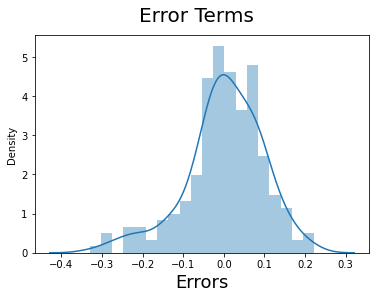

In [ ]:
fig = plt.figure()
sns.distplot((y_test - y_test_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)     
plt.xlabel('Errors', fontsize = 18) 

###Insights: Again we verify that error terms are normally distributed

Plotting scatter plot for checking heteroscedasticity

Text(0, 0.5, 'Residuals')

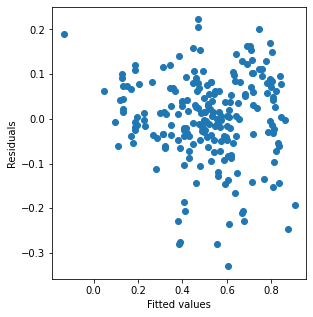

In [ ]:
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(y_test_cnt, (y_test-y_test_cnt))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

###Insights: Again we verify that there is no heteroscedasticity

###13.2 : Checking the R2 value for train data 

In [ ]:
train_r2 = r2_score(y_train,y_train_cnt)
print(train_r2)

0.8360233701515918


###13.3: Checking the R2 value for test data 

In [ ]:
test_r2 = r2_score(y_test,y_test_cnt)
print(test_r2)

0.805407680173852


###Insights: Our R2 Value for train data set is 0.836(83.6%) and test data set is 0.805(80.5%) , There difference is 3.1% which is acceptable 

###13.4 : Calculate the adjusted R2 value 

Formula for adjusted R2 is 

***R2adj =1−(1−R2)∗ n−1/n−p−1***

Checking adjusted R2 for train data 

In [ ]:
n = X_train.shape[0]
p = X_train.shape[1]

train_adjusted_r2 = 1-(1-train_r2)*(n-1)/(n-p-1)
print(train_adjusted_r2)

0.826477953029439


Checking adjusted R2 for test data 

In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]

test_adjusted_r2 = 1-(1-test_r2)*(n-1)/(n-p-1)
print(test_adjusted_r2)

0.794072205232523


Taking means of the test and train predicted data 

In [ ]:
round((y_test-y_test_cnt).mean(),2)

0.0

In [ ]:
round((y_train-y_train_cnt).mean(),2)

0.0

###Insights: The residual means are  0.0 

###Insights: Our adjusted R2 for train data set is 82% and for test data is 79.4% , There fore the difference is 3.2% which is satisfactory 

####Equation of best fitted line is : 
cnt=(0.2338 × yr) - (0.1498 × windspeed) + (0.4923 x Temp) + (0.0680 × season4) + (0.0467 x season_summer) + (0.0831 x season_winter) - (0.0486 x mnth_july) +  (0.0721 x mnth_september) - (0.0451 x weekday_tuesday) - (0.816 x weathersit_cloudy) - (0.2856 x weathersit_light_snow/rain)

### 13.6 : Insights: Our top predictor variables are 
1. Temp with coefficient of  0.4923 ,means cnt increases by 0.4923 units if  one unit increases in temp
2.  weathersit_light snow/rain (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) with coefficient of -0.2856 ,means cnt decreases by -0.2856 units if  one unit increases in weathersit_3
3. yr with coefficient of 0.2338 , means cnt increases by 0.2338 units if  one unit increases in year